# B2C2 remote tech challenge (data analysis)

Author: Alex de Vries.
Date: 30 - May 2021.

My reflection on this test is shown at the end in chapter 6. I hope this file gives a glimpse of the Python skills I currently have. 
- 1) Instructions
- 2) Library importing & data loading
- 3) Data exploration
- 4) Train model
- 5) Summarized results (pickle the model)
- 6) Review on the process


## 1) Instructions
Use the features to predict:
a) The sign of the target (is it positive or negative)
b) The magnitude of the target

Write two scripts:
The first to load in the data set, train the models and save the model to pickle
The second to load in the data set and apply it the model to it (we will run this on an unseen data set to test out of sample)

Feel free to submit any other images / commentary on anything of interest during your data exploration, also further steps you might have taken given more time. The evaluation is based on the approach taken to modelling this data, rather than the absolute results of mean squared error etc. Please use this as a chance to showcase your deeper understanding of the modelling and data exploration. Please use Jupyter Notebooks if possible.

## 2) library importing & data loading

In [15]:
# load all relevant libraries
# note: I am running Jupyter Notebooks on Linux Mint. Some libraries require an additional step before importing.
import sys
!{sys.executable} -m pip install sklearn
!{sys.executable} -m pip install seaborn

import seaborn as sns
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score # R2
from sklearn.metrics import mean_squared_error # RMSE

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import mutual_info_regression

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [16]:
# load the test data
with open("candidate-test-data.pkl", 'rb') as f:
    df = pickle.load(f, encoding="latin1") 
f.close()

## 3) data exploration

In [17]:
print("---displaying test data---")
print(type(df))
df.head()

---displaying test data---
<class 'pandas.core.frame.DataFrame'>


,feature_10,feature_11,feature_8,feature_9,feature_2,feature_3,feature_0,feature_1,feature_6,feature_7,feature_4,feature_5,feature_12,target_0
0,10.10,0,0.085,0.28,1.000000,1.34,12,-0.29,1.75,-1.13,4,-0.76,0.66,-6.50
1,12.20,0,2.585,-0.11,1.000000,2.36,0,-2.56,1.85,-2.80,7,-2.95,-1.05,-4.30
2,-1.87,0,8.960,-0.20,1.000000,2.99,11,-2.92,12.44,-3.90,7,-3.51,0.39,0.72
3,-0.04,0,0.057,-1.57,1.000000,14.31,11,1.88,-7.23,-3.18,4,2.41,0.59,-10.24
4,0.67,1,0.045,-1.58,0.924577,12.34,12,1.57,-6.76,-2.87,11,2.41,0.68,-9.53


In [18]:
df.describe()

,feature_10,feature_11,feature_8,feature_9,feature_2,feature_3,feature_0,feature_1,feature_6,feature_7,feature_4,feature_5,feature_12,target_0
count,271995.000000,271995.000000,271995.000000,271995.000000,271995.000000,271995.000000,271995.000000,271995.000000,271995.000000,271995.000000,271995.000000,271995.000000,271995.000000,271995.000000
mean,0.116311,0.618478,6.957020,-0.886414,0.402306,0.132220,7.740466,-0.590151,0.173645,0.003039,6.841946,0.194936,0.148393,-1.638634
std,9.029769,0.485761,19.790288,3.012869,0.411511,21.754544,5.015524,34.527937,16.175515,6.160517,4.074344,9.458349,6.693244,9.150847
min,-144.640000,0.000000,0.000000,-72.200000,0.000000,-436.000000,0.000000,-513.570000,-279.370000,-107.250000,0.000000,-193.280000,-118.140000,-196.430000
25%,-2.520000,0.000000,0.066000,-1.950000,0.029606,-6.520000,1.000000,-11.530000,-4.790000,-1.830000,4.000000,-2.570000,-1.780000,-4.470000
50%,0.050000,1.000000,1.126000,-0.350000,0.199156,0.140000,10.000000,0.300000,0.050000,-0.080000,8.000000,0.040000,0.000000,-0.830000
75%,2.710000,1.000000,5.876000,0.310000,0.989446,7.010000,11.000000,11.730000,4.980000,1.550000,11.000000,2.850000,1.900000,1.660000
max,210.300000,1.000000,1668.343000,67.780000,1.000000,408.770000,15.000000,515.620000,278.350000,128.390000,13.000000,177.690000,96.480000,192.430000


Useful to note from the describe() table above is that the count is 271995 for all, and some features have a negative minimum value. For some analysis this is relevant, but not in this case.

additional data exploration steps done which are useful but showing the output will cluther the notebook file:
<br/> df.info()      (check if non-null and see the type for each column, useful: all non-zero columns and types are numerical)

## 3.1 Evaluate Outliers
This visual inspection is not possible with many more features. In this case it still gives a clear overview of the deatils of the 13 features.

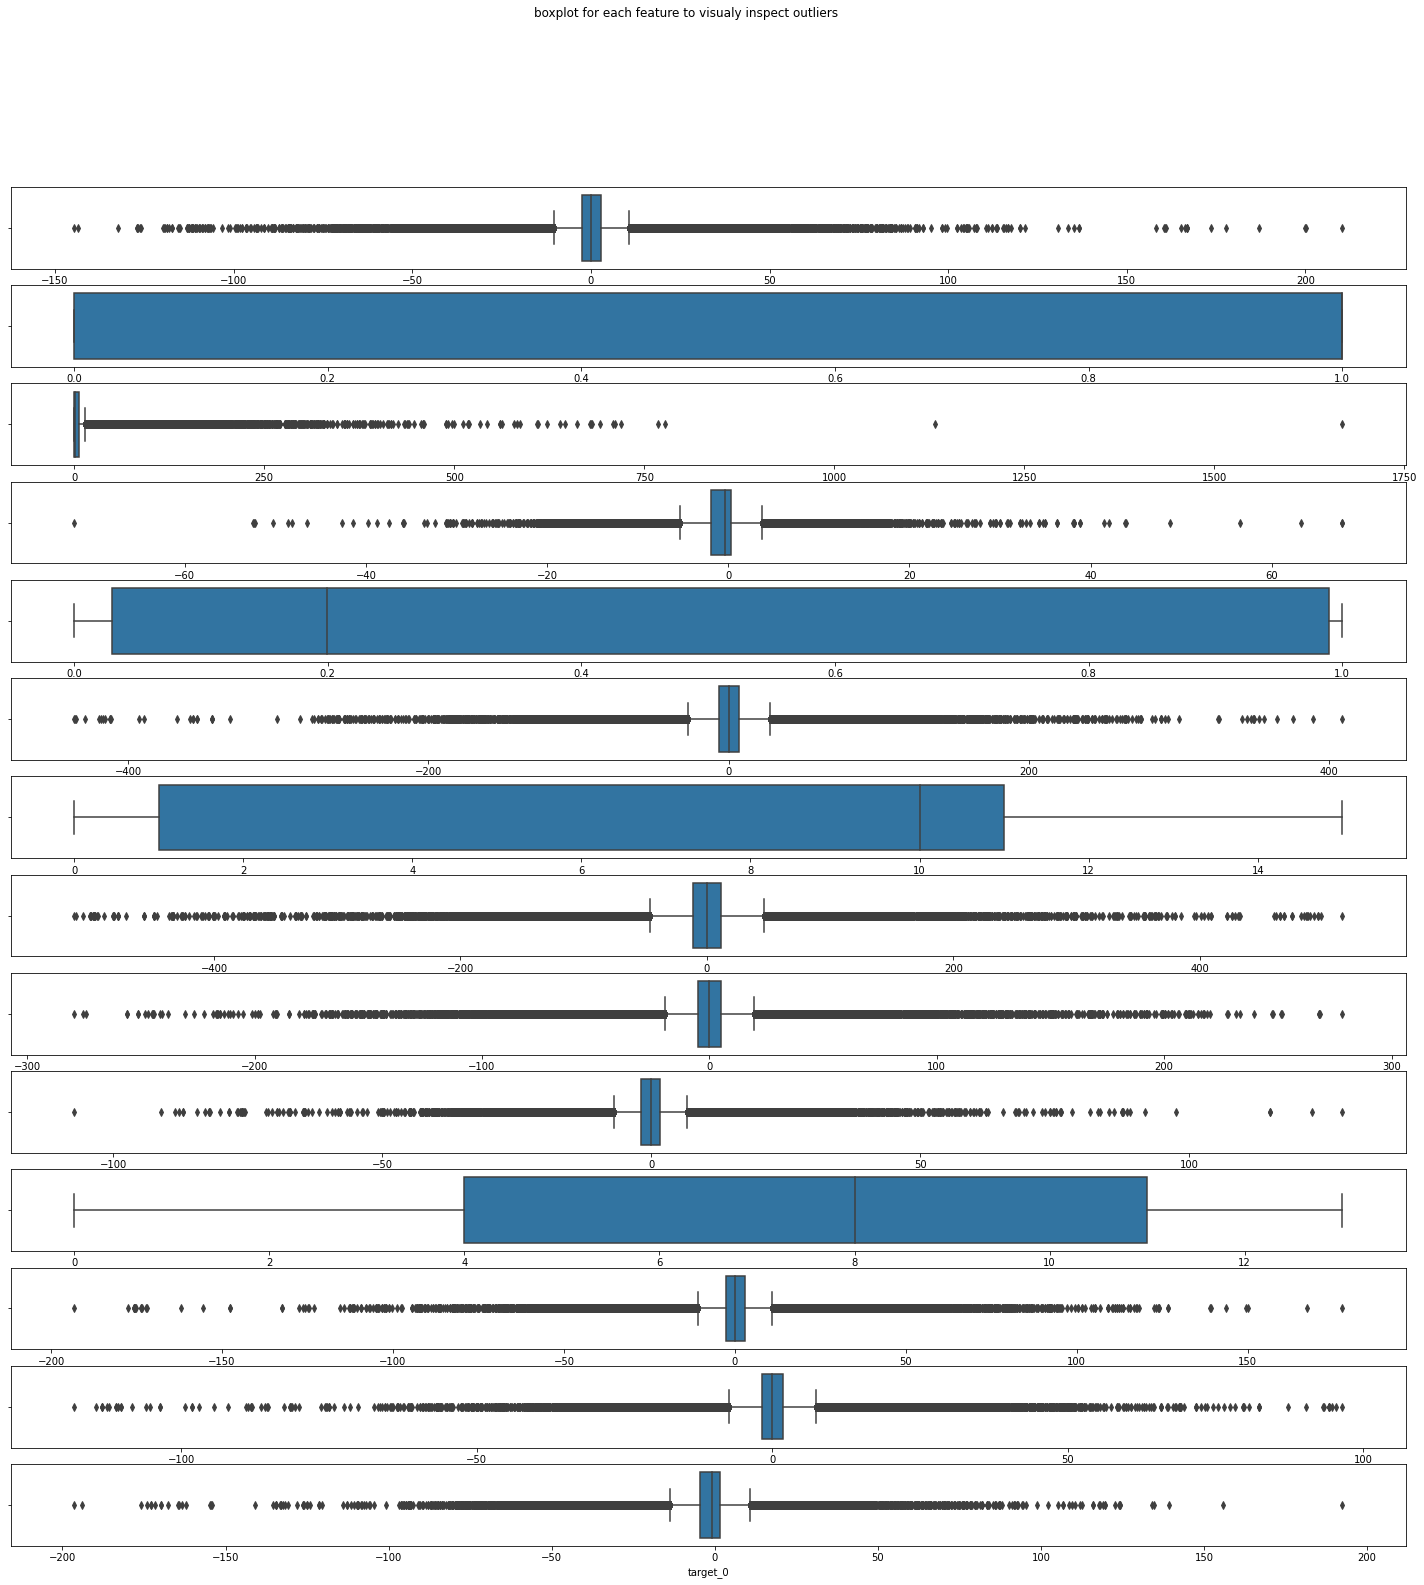

In [19]:
fig, axs = plt.subplots(14,1, figsize = (25,25))
plot_10 = sns.boxplot(df["feature_10"], ax = axs[0])
plot_11 = sns.boxplot(df["feature_11"], ax = axs[1])
plot_8 = sns.boxplot(df["feature_8"], ax = axs[2])
plot_9 = sns.boxplot(df["feature_9"], ax = axs[3])
plot_2 = sns.boxplot(df["feature_2"], ax = axs[4])
plot_3 = sns.boxplot(df["feature_3"], ax = axs[5])
plot_0 = sns.boxplot(df["feature_0"], ax = axs[6])
plot_1 = sns.boxplot(df["feature_1"], ax = axs[7])
plot_6 = sns.boxplot(df["feature_6"], ax = axs[8])
plot_7 = sns.boxplot(df["feature_7"], ax = axs[9])
plot_4 = sns.boxplot(df["feature_4"], ax = axs[10])
plot_5 = sns.boxplot(df["feature_5"], ax = axs[11])
plot_12 = sns.boxplot(df["feature_12"], ax = axs[12])
plot_target = sns.boxplot(df["target_0"], ax = axs[13])
fig.suptitle('boxplot for each feature to visualy inspect outliers')
plt.show()

## 3.2) Select features 
There are many ways to deal with outliers and select features. What follows is an overview of three methods and discuss why I pick one of the methods.

In [20]:
# Method 1: reduce outliers based on a specified quantile.
# This code shows how to exclude the 10th percentile from the data for the target field. 
# This can be helpful to not overfit the model.

# I performed a quick test removing outliers and found a decrease in predictive ability.
# Therefore I remove no outliers.

df_test = df
#Q1 = df_test.target_0.quantile(0.10)
#Q3 = df_test.target_0.quantile(0.90)
#IQR = Q3 - Q1
#df_test = df_test[(df_test.target_0 >= Q1 - 1.5*IQR) & (df_test.target_0 <= Q3 + 1.5*IQR)]

In [21]:
#Before selecting features we need to define the training and testing data using all features.

x = df_test.drop(columns=['target_0'])
y = df_test.target_0
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

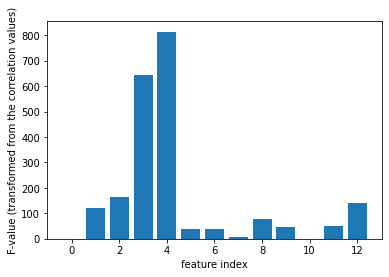

In [22]:
# Method 2: Correlation metric

f_selector = SelectKBest(score_func=f_regression, k='all')
f_selector.fit(x_train, y_train)
# transform train input data
X_train_fs = f_selector.transform(x_train)
# transform test input data
X_test_fs = f_selector.transform(x_test)
# Plot the scores for the features
plt.bar([i for i in range(len(f_selector.scores_))], f_selector.scores_)
plt.xlabel("feature index")
plt.ylabel("F-value (transformed from the correlation values)")
plt.show()

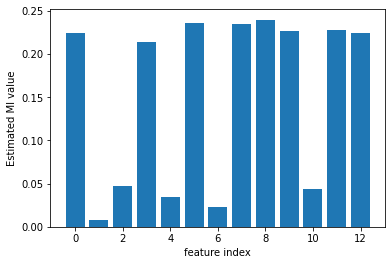

In [23]:
# Method 3: mutual correlation statistic
# (takes some time to run)
f_selector = SelectKBest(score_func=mutual_info_regression, k='all')
f_selector.fit(x_train, y_train)
# transform train input data
X_train_fs = f_selector.transform(x_train)
# transform test input data
X_test_fs = f_selector.transform(x_test)
# Plot the scores for the features
plt.bar([i for i in range(len(f_selector.scores_))], f_selector.scores_)
plt.xlabel("feature index")
plt.ylabel("Estimated MI value")
plt.show()

When viewing both plots we find that the correlation plot shows fewer features being relevant than the mutual correlation plot. When viewing the boxplots earlier in this document we find that there are many outliers. This is known to attribute to a higher mutual correlation between the feature and the target. Because of so many outliers we will focus on the results from the correlation plot. We pick any feature with an f-value above 300: 10,11, 2, 1,6,7.

In [25]:
# Create a new dataframe with only the selected features.
# If there are many features this process can not be done manually. 
# With the given time and the small number of features I keep it simple.

# df2 = df_test.drop(['feature_11', 'feature_8', 'feature_4', 'feature_2', 'feature_0'], axis = 1)
# df2 = df_test

columns = ['feature_11', 'feature_2', 'feature_9', 'target_0']
df2 = pd.DataFrame(df_test, columns=columns)

df2.head()

,feature_11,feature_2,feature_9,target_0
0,0,1.000000,0.28,-6.50
1,0,1.000000,-0.11,-4.30
2,0,1.000000,-0.20,0.72
3,0,1.000000,-1.57,-10.24
4,1,0.924577,-1.58,-9.53


In [26]:
df2.shape

(271995, 4)

## Split data

In [27]:
x = df2.drop(columns=['target_0'])
y = df2.target_0
x.head()

,feature_11,feature_2,feature_9
0,0,1.000000,0.28
1,0,1.000000,-0.11
2,0,1.000000,-0.20
3,0,1.000000,-1.57
4,1,0.924577,-1.58


In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

# 4) Train model

In [29]:
lr = LinearRegression(normalize=True)
lr = lr.fit(x_train, y_train)

In [30]:
y_pred = lr.predict(x_test)

### 4.1) Evaluate the model

In [31]:
lr.score(x_test, y_test)


0.00559261010818024

In [32]:
lr_mse = mean_squared_error(y_test, y_pred)
lr_rmse = np.sqrt(lr_mse)
lr_rmse

9.169427497458804

In [33]:
print('Mean Squared Error: %.4f' % mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error %0.4f' %lr_rmse)
print('Coefficient of Determination (r2) %.4f' % r2_score(y_test, y_pred))

# The model shows a relatively small amount of mean squared error and a significant R-squared value (r < 0.05)

Mean Squared Error: 84.0784
Root Mean Squared Error 9.1694
Coefficient of Determination (r2) 0.0056


In [34]:
coeff = pd.DataFrame(lr.coef_, x.columns, columns=['Coefficient'])
print('Intercept: %.4f' %lr.intercept_)
print('Coefficients:')
coeff

# Only these three features give a coefficient not close to 0.
# This indicates that the other features do not improve the model.
# Still, the model does not give a linear relation when comparing the test and prediction data. (shown in the following plot).

Intercept: -1.1680
Coefficients:


,Coefficient
feature_11,0.248899
feature_2,-1.209225
feature_9,0.145702


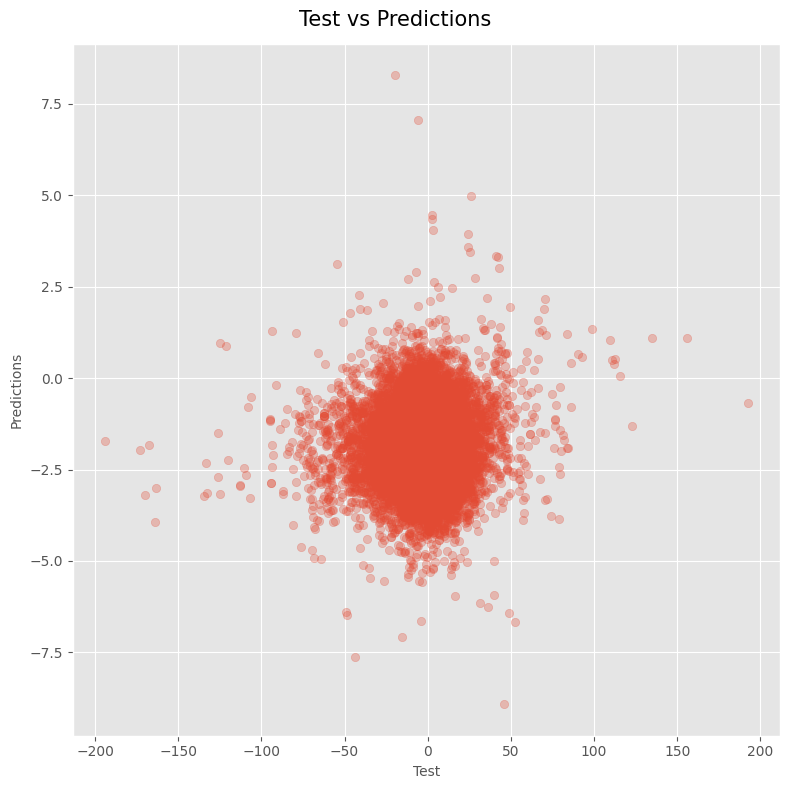

In [35]:
# Plotting y_test and y_pred
plt.style.use('default')
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(y_test, y_pred, alpha=0.3)
plt.suptitle('Test vs Predictions', fontsize=15)               
plt.xlabel('Test', fontsize=10)                               
plt.ylabel('Predictions', fontsize=10)                        

fig.tight_layout()

# 5) summarize results
There are multiple things I would change in my analysis. At the end I found out they proper way to pickle models and load them. All the steps done in the previous chapters are combined in the 'train_model' function. 

In [37]:
# change these paths to a local directory for saving models.
Project_path = "/home/alex/Desktop/creative/self_study/"
model_path = Project_path + "linear_regression_model.pickle"

def train_model(data):
    columns = ['feature_11', 'feature_2', 'feature_9', 'target_0']
    df = pd.DataFrame(data, columns=columns)
    lr = LinearRegression(normalize=True)
    
    x = df.drop(columns=['target_0'])
    y = df.target_0
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42) 
    
    model = lr.fit(x_train, y_train) 
    y_pred = lr.predict(x_test)
    lr_mse = mean_squared_error(y_test, y_pred)
    lr_rmse = np.sqrt(lr_mse)

    return model
    
lrmodel = train_model(df)
pickle.dump(lrmodel, open(model_path, 'wb'))

In [38]:
LR_model = pickle.load(open(model_path,'rb'))
pred = LR_model.score(x,y)
print ("scoring value:", pred)

scoring value: 0.005977425224869215


# 6) Review on the process
I would change multiple things if I would do it again. There is not that much time, and a lot was spent on investigating the qualities of the data. This is what I normally do, but in this case the focus should lie on choosing the right ML technique and model fitting. 

Secondly, instead of focussing on linear regression I could compare results for different techniques such as logistic regression, random forrest, decision tree, gaussian naive bayes or k-nearest neighbors (most common techniques). The results in my current model are not great, although the significant features were found. It would then be easier to get the direction and magnitude of the target.

Lastly, I would spend more time on manipulating the features such as normalize the data to potentially find more relations and improve prediction. In the end I hope this project does give a general overview of my data analysis skills in Python. With more time, and now a better understanding of pickle a better model would be the result.